In [1]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import pandas as pd
import re
import string
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

In [3]:
spam_path = "../input/spam-text-message-classification/SPAM text message 20170820 - Data.csv"
df = pd.read_csv(spam_path)
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
X = df.Message
Y = df.Category
X.head(3), Y.head(3)

(0    Go until jurong point, crazy.. Available only ...
 1                        Ok lar... Joking wif u oni...
 2    Free entry in 2 a wkly comp to win FA Cup fina...
 Name: Message, dtype: object,
 0     ham
 1     ham
 2    spam
 Name: Category, dtype: object)

In [5]:
whole_text = ''
for i in X:
    whole_text += i + ' '

In [6]:
stop_words = stopwords.words("english")
def clean_text(text):
    text = text.lower()           # converting to lowercase
    text = re.sub("@\S+", " ", text)  
    text = re.sub("https*\S+", " ", text)      #\S - не пробел 
    text = re.sub("www\S+", " ", text)
    text = re.sub("#\S+", " ", text)
    text = re.sub("\d", " ", text)        # remove all numbers
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)     # remove punctuations
    text = re.sub('\n', ' ', text)        
    text = re.sub('\s{2,}',' ', text)        # remove extra spaces
    text = ' '.join([word for word in text.split(' ') if word not in stop_words])
    return text

In [7]:
whole_text_clean = clean_text(whole_text)
whole_text_clean[:120]

'go jurong point crazy available bugis n great world la e buffet cine got amore wat ok lar joking wif u oni free entry wk'

In [8]:
tokens = word_tokenize(whole_text_clean)
tokens[:9]

['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world']

In [9]:
lemmatizer = WordNetLemmatizer()
lemtokens= [lemmatizer.lemmatize(t) for t in tokens]
lemtokens[:9]

['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world']

In [10]:
dictionary = list(set(lemtokens)) 
dictionary[:7]

['professional', 'dhoni', 'cribbs', 'reache', 'dey', 'like', 'txtauction']

In [11]:
#dims = len(dictionary) dims - 7133

In [12]:
def convert(text):
    text = clean_text(text)
    tok = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(t) for t in tok]
    res = [dictionary.index(i) for i in lem]
    return res

In [13]:
X = X.apply(convert)
X.head(3)

0    [1071, 6257, 922, 7088, 2100, 3574, 1609, 4722...
1                  [2720, 5906, 4111, 5061, 5164, 630]
2    [3195, 3058, 33, 4315, 5718, 3071, 3031, 5813,...
Name: Message, dtype: object

In [14]:
def encoding(text):
    if text == 'ham':
        return 0
    elif text == 'spam':
        return 1
    else:
        return -1

In [15]:
Y = Y.apply(encoding) 
Y.head(3)             

0    0
1    0
2    1
Name: Category, dtype: int64

In [16]:
# делим свою выборку на тренировочную и тестовую часть
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)                

In [17]:
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension)) 
    for i, sequence in enumerate(sequences): 
        for j in sequence:
            results[i, j] = 1.
    return results

In [18]:
x_train = vectorize_sequences(X_train)
x_test = vectorize_sequences(X_test)
x_train[1]

array([0., 0., 0., ..., 0., 0., 0.])

In [19]:
y_train = np.asarray(Y_train).astype("float32")
y_test = np.asarray(Y_test).astype("float32")

In [20]:
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=512, #Обучаем модель, перебирая данные в пакетах по 512 примера
                    validation_split=0.2,
                    shuffle = True,
                    verbose = 2)


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

Epoch 1/10
7/7 - 1s - loss: 0.6339 - accuracy: 0.8724 - val_loss: 0.5663 - val_accuracy: 0.9473
Epoch 2/10
7/7 - 0s - loss: 0.5206 - accuracy: 0.9731 - val_loss: 0.4859 - val_accuracy: 0.9596
Epoch 3/10
7/7 - 0s - loss: 0.4438 - accuracy: 0.9795 - val_loss: 0.4257 - val_accuracy: 0.9652
Epoch 4/10
7/7 - 0s - loss: 0.3844 - accuracy: 0.9815 - val_loss: 0.3768 - val_accuracy: 0.9697
Epoch 5/10
7/7 - 0s - loss: 0.3354 - accuracy: 0.9857 - val_loss: 0.3358 - val_accuracy: 0.9709
Epoch 6/10
7/7 - 0s - loss: 0.2937 - accuracy: 0.9882 - val_loss: 0.3006 - val_accuracy: 0.9709
Epoch 7/10
7/7 - 0s - loss: 0.2578 - accuracy: 0.9896 - val_loss: 0.2701 - val_accuracy: 0.9731
Epoch 8/10
7/7 - 0s - loss: 0.2267 - accuracy: 0.9905 - val_loss: 0.2437 - val_accuracy: 0.9731
Epoch 9/10
7/7 - 0s - loss: 0.1996 - accuracy: 0.9916 - val_loss: 0.2209 - val_accuracy: 0.9731
Epoch 10/10
7/7 - 0s - loss: 0.1759 - accuracy: 0.9921 - val_loss: 0.2008 - val_accuracy: 0.9753


In [21]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                320032    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 320,065
Trainable params: 320,065
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
history_dict = history.history # записывает показатели обучения для каждой эпохи 
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

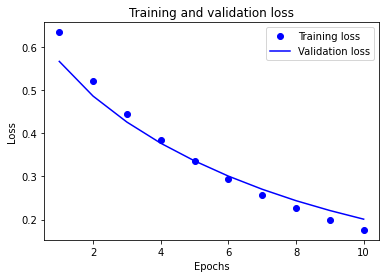

In [23]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [24]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.20084334909915924
Test accuracy: 0.9802690744400024
